# Attempt at Automating Reorientation from User Selection of WT-like Striations

In [7]:
import util
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
import time
import scipy.fftpack as fftp

# for grabbing the subsection of the image
import pygame, sys
from PIL import Image
pygame.init()

ImportError: No module named pygame

### Using much the same routine as resizingTests.ipynb so I will keep comments to a minimum

In [ ]:
def displayImage(screen, px, topleft, prior):
    # ensure that the rect always has positive width, height
    x, y = topleft
    width =  pygame.mouse.get_pos()[0] - topleft[0]
    height = pygame.mouse.get_pos()[1] - topleft[1]
    if width < 0:
        x += width
        width = abs(width)
    if height < 0:
        y += height
        height = abs(height)

    # eliminate redundant drawing cycles (when mouse isn't moving)
    current = x, y, width, height
    if not (width and height):
        return current
    if current == prior:
        return current

    # draw transparent box and blit it onto canvas
    screen.blit(px, px.get_rect())
    im = pygame.Surface((width, height))
    im.fill((128, 128, 128))
    pygame.draw.rect(im, (32, 32, 32), im.get_rect(), 1)
    im.set_alpha(128)
    screen.blit(im, (x, y))
    pygame.display.flip()

    # return current box extents
    return (x, y, width, height)

def setup(path):
    px = pygame.image.load(path)
    screen = pygame.display.set_mode( px.get_rect()[2:] )
    screen.blit(px, px.get_rect())
    pygame.display.flip()
    return screen, px

def mainLoop(screen, px):
    topleft = bottomright = prior = None
    n=0
    while n!=1:
        for event in pygame.event.get():
            if event.type == pygame.MOUSEBUTTONUP:
                if not topleft:
                    topleft = event.pos
                else:
                    bottomright = event.pos
                    n=1
        if topleft:
            prior = displayImage(screen, px, topleft, prior)
    return ( topleft + bottomright )

def giveSubsection(inputFile):
    input_loc = inputFile
    output_loc = 'out.png'
    screen, px = setup(input_loc)
    left, upper, right, lower = mainLoop(screen, px)

    # ensure output rect always has positive width, height
    if right < left:
        left, right = right, left
    if lower < upper:
        lower, upper = upper, lower
    im = Image.open(input_loc)
    subsection = im.crop(( left, upper, right, lower))
    pygame.display.quit()
    #im.save(output_loc)
    
    return subsection

## 0. Define Arguments

In [2]:
root = "../nfatpaper/Faruk_May10/"
imgName = "Export_WT WGA-CaN 488nm-1power-60gain sum2frames 1spf celll_004 frame 108.tif"


filterTwoSarcomereSize = 25
display = True

## 1. Read in Image

In [3]:
img = util.ReadImg(root+imgName,renorm=True)

if display:
    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.colorbar()
    plt.title("Raw Image")
    plt.show()

NameError: name 'util' is not defined

## 2. Select subsection of image that exhibits highly conserved network of TTs

In [11]:
subsection = giveSubsection(root+imgName)
subsection = np.array(subsection.convert("F"))

In [12]:
# best to normalize the subsection for display purposes
subsection /= np.max(subsection)

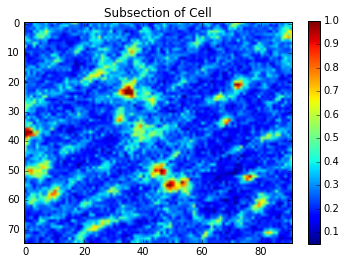

In [13]:
if display:
    plt.figure()
    plt.imshow(subsection)
    plt.title("Subsection of Cell")
    plt.colorbar()
    plt.show()

### 3. Using this subsection, calculate the PSD

In [18]:
def givePS(array):
    start = time.time()
    dims = np.shape(array)
    psd = np.absolute(array)
    end = time.time()
    
    return psd

In [23]:
sdimg = subsection.copy()
transform1 = fftp.fft2(sdimg)
new1 = fftp.fftshift(transform1.copy())
ps = np.real(givePS(new1.copy()))

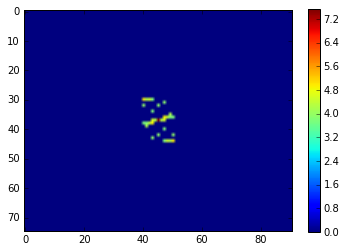

In [27]:
loggedPs = np.log(np.real(ps.copy()))
loggedPs[loggedPs < 0.5 * np.max(loggedPs)] = 0

if display:
    plt.figure()
    plt.imshow(loggedPs)
    plt.colorbar()
    plt.show()